In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math 
import numpy as np
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap
from GetData import *


c:\Users\lucas\GraveTeamMain\Gravitational-Waves-Research-23-24\Data Analysis\GetData.py:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  confident["mass_1_source"] = confident["mass1"]
c:\Users\lucas\GraveTeamMain\Gravitational-Waves-Research-23-24\Data Analysis\GetData.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  confident["mass_2_source"] = confident["mass2"]
c:\Users\lucas\GraveTeamMain\Gravitational-Waves-Research-23-24\Data Analysis\GetData.py:142: SettingWithCopyWarning: 
A value is trying

In [2]:
#O1 = pd.read_csv("../Data/GWTC-1.csv")
#O2 = pd.read_csv("../Data/GWTC-2.csv")
#O3 = pd.read_csv("../Data/GWTC-3.csv")

In [3]:
#O3_indexes_to_remove = [35,36,37,38,39,41]

#O3 = O3.drop(O3_indexes_to_remove)

In [4]:
len(O3)

35

In [5]:
"""
O3_BNS = pd.DataFrame(columns=O3.columns)
O3_BBH = pd.DataFrame(columns=O3.columns)

for index, row in O3.iterrows():
    if row["mass_1_source"] < 2.16 or row["mass_2_source"] < 2.16:
        O3_BNS = pd.concat([O3_BNS, pd.DataFrame([row])], ignore_index=True)
    if row["mass_1_source"] >= 2.16 and row["mass_2_source"] >= 2.16:
        O3_BBH = pd.concat([O3_BBH, pd.DataFrame([row])], ignore_index=True)

print(len(O3_BNS))
print(len(O3_BBH))
"""

'\nO3_BNS = pd.DataFrame(columns=O3.columns)\nO3_BBH = pd.DataFrame(columns=O3.columns)\n\nfor index, row in O3.iterrows():\n    if row["mass_1_source"] < 2.16 or row["mass_2_source"] < 2.16:\n        O3_BNS = pd.concat([O3_BNS, pd.DataFrame([row])], ignore_index=True)\n    if row["mass_1_source"] >= 2.16 and row["mass_2_source"] >= 2.16:\n        O3_BBH = pd.concat([O3_BBH, pd.DataFrame([row])], ignore_index=True)\n\nprint(len(O3_BNS))\nprint(len(O3_BBH))\n'

In [6]:
# Determining the number of mass bins with Sturges rule:
n_O3_BBH = math.ceil(np.log2(len(O3_BBH)) + 1)
print(n_O3_BBH, " bins for mass in O3 BBH")
n_O3_BNS = math.ceil(np.log2(len(O3_BNS)) + 1)
print(n_O3_BNS, " bins for mass in O3 BNS")

7  bins for mass in O3 BBH
2  bins for mass in O3 BNS


In [7]:
O3_min_chirp_mass = min(O3_BBH["chirp_mass_source"])
O3_diff_BBH = max(O3_BBH["chirp_mass_source"]) - O3_min_chirp_mass
print(O3_diff_BBH)

55.44


In [8]:
O3_BBH_mass_bin_range = O3_diff_BBH/7
print(O3_BBH_mass_bin_range)

7.92


In [9]:
# Since red/orange colors haev low wavelengths, they will represent the lower mass ranges 
O3_mass_val = O3_BBH_mass_bin_range
O3_colors = ["red", "orange", "yellow", "green", "cyan", "indigo", "pink"]

for index, row in O3_BBH.iterrows():
    if row["chirp_mass_source"] < O3_min_chirp_mass + O3_mass_val:
        O3_BBH.loc[index, "color"] = "red"
    elif row["chirp_mass_source"] < O3_min_chirp_mass + O3_mass_val * 2:
        O3_BBH.loc[index, "color"] = "orange"
    elif row["chirp_mass_source"] < O3_min_chirp_mass + O3_mass_val * 3:
        O3_BBH.loc[index, "color"] = "yellow"
    elif row["chirp_mass_source"] < O3_min_chirp_mass + O3_mass_val * 4:
        O3_BBH.loc[index, "color"] = "green"
    elif row["chirp_mass_source"] < O3_min_chirp_mass + O3_mass_val * 5:
        O3_BBH.loc[index, "color"] = "cyan"
    elif row["chirp_mass_source"] < O3_min_chirp_mass + O3_mass_val * 6:
        O3_BBH.loc[index, "color"] = "indigo"
    else:
        O3_BBH.loc[index, "color"] = "pink"


C:\Users\lucas\AppData\Local\Temp\ipykernel_19036\258097277.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  O3_BBH.loc[index, "color"] = "orange"


In [10]:
# Determining the number of mass bins with Sturges rule:
n_O4_BBH = math.ceil(np.log2(len(O4_BBH)) + 1)
print(n_O4_BBH, " bins for mass in O4 BBH")
n_O4_BNS = math.ceil(np.log2(len(O4_BNS)) + 1)
print(n_O4_BNS, " bins for mass in O4 BNS")

O4_min_chirp_mass = min(O4_BBH["chirp_mass"])
O4_diff_BBH = max(O4_BBH["chirp_mass"]) - O4_min_chirp_mass
print("O4 chirp mass range", O4_diff_BBH)

O4_BBH_mass_bin_range = O4_diff_BBH/n_O4_BBH
print("bin size for O4 BBH", O4_BBH_mass_bin_range)

8  bins for mass in O4 BBH
1  bins for mass in O4 BNS
O4 chirp mass range 162.9204471662701
bin size for O4 BBH 20.36505589578376


In [11]:
# Since red/orange colors haev low wavelengths, they will represent the lower mass ranges 
O4_mass_val = O4_BBH_mass_bin_range
O4_colors = ["red", "orange", "yellow", "green", "cyan", "blue", "indigo", "pink"]

for index, row in O4_BBH.iterrows():
    for i in range(n_O4_BBH):
        if i == n_O4_BBH - 1:
            O4_BBH.loc[index, "color"] = O4_colors[-1]
        if row["chirp_mass"] < O4_min_chirp_mass + O4_mass_val * (i + 1):
            O4_BBH.loc[index, "color"] = O4_colors[i]
            break

C:\Users\lucas\AppData\Local\Temp\ipykernel_19036\4002421841.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  O4_BBH.loc[index, "color"] = O4_colors[i]


In [12]:
"""
plt.scatter(O3_BBH["luminosity_distance"], O3_BBH["network_matched_filter_snr"], color = O3_BBH["color"])

coefficients = np.polyfit(O3_BBH["luminosity_distance"], O3_BBH["network_matched_filter_snr"], 2)
fit_line_O3_BBH = np.poly1d(coefficients)
x = np.linspace(min(O3_BBH["luminosity_distance"]), max(O3_BBH["luminosity_distance"]), 100)
plt.plot(x, fit_line_O3(x), color="black")

y_pred = fit_line(O3_BBH["luminosity_distance"])
r2_value = r2_score(O3_BBH["network_matched_filter_snr"], y_pred)
print("R^2 value:", r2_value)

plt.scatter([], [], color="red", label=": 2.16 - 7.92 $M_{\odot}$")
plt.scatter([], [], color="orange", label=": 7.92 - 15.84 $M_{\odot}$")
plt.scatter([], [], color="yellow", label=": 15.84 - 23.76 $M_{\odot}$")
plt.scatter([], [], color="green", label=": 23.76 - 31.68 $M_{\odot}$")
plt.scatter([], [], color="cyan", label=": 31.68 - 39.6 $M_{\odot}$")
plt.scatter([], [], color="indigo", label=": 39.6 - 47.52 $M_{\odot}$")
plt.scatter([], [], color="pink", label=": 47.52 - $M_{\odot}$")

plt.legend()
plt.ylabel("SNR")
plt.xlabel("$D_L$")
"""

'\nplt.scatter(O3_BBH["luminosity_distance"], O3_BBH["network_matched_filter_snr"], color = O3_BBH["color"])\n\ncoefficients = np.polyfit(O3_BBH["luminosity_distance"], O3_BBH["network_matched_filter_snr"], 2)\nfit_line_O3_BBH = np.poly1d(coefficients)\nx = np.linspace(min(O3_BBH["luminosity_distance"]), max(O3_BBH["luminosity_distance"]), 100)\nplt.plot(x, fit_line_O3(x), color="black")\n\ny_pred = fit_line(O3_BBH["luminosity_distance"])\nr2_value = r2_score(O3_BBH["network_matched_filter_snr"], y_pred)\nprint("R^2 value:", r2_value)\n\nplt.scatter([], [], color="red", label=": 2.16 - 7.92 $M_{\\odot}$")\nplt.scatter([], [], color="orange", label=": 7.92 - 15.84 $M_{\\odot}$")\nplt.scatter([], [], color="yellow", label=": 15.84 - 23.76 $M_{\\odot}$")\nplt.scatter([], [], color="green", label=": 23.76 - 31.68 $M_{\\odot}$")\nplt.scatter([], [], color="cyan", label=": 31.68 - 39.6 $M_{\\odot}$")\nplt.scatter([], [], color="indigo", label=": 39.6 - 47.52 $M_{\\odot}$")\nplt.scatter([], [

Text(0, 0.5, '$D_L$')

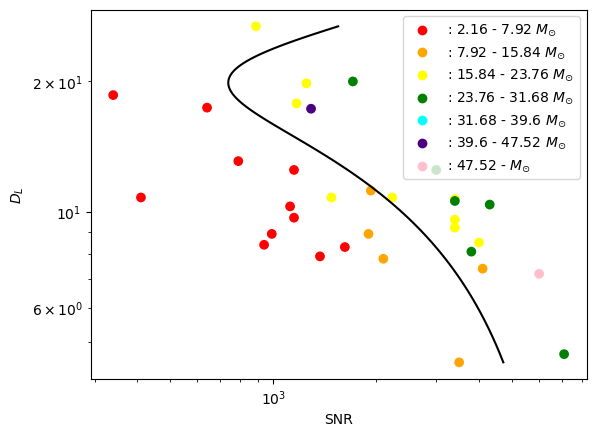

In [13]:
# Inverting so I can get a luminosity distance as a function of SNR (so it can be applied to O4 data):
plt.scatter(O3_BBH["luminosity_distance"],O3_BBH["network_matched_filter_snr"], color = O3_BBH["color"])

coefficients = np.polyfit(O3_BBH["network_matched_filter_snr"],O3_BBH["luminosity_distance"], 2)
fit_line_O3_BBH = np.poly1d(coefficients)
x = np.linspace(min(O3_BBH["network_matched_filter_snr"]), max(O3_BBH["network_matched_filter_snr"]), 100)
plt.plot(fit_line_O3_BBH(x), x, color="black")

plt.scatter([], [], color="red", label=": 2.16 - 7.92 $M_{\odot}$")
plt.scatter([], [], color="orange", label=": 7.92 - 15.84 $M_{\odot}$")
plt.scatter([], [], color="yellow", label=": 15.84 - 23.76 $M_{\odot}$")
plt.scatter([], [], color="green", label=": 23.76 - 31.68 $M_{\odot}$")
plt.scatter([], [], color="cyan", label=": 31.68 - 39.6 $M_{\odot}$")
plt.scatter([], [], color="indigo", label=": 39.6 - 47.52 $M_{\odot}$")
plt.scatter([], [], color="pink", label=": 47.52 - $M_{\odot}$")
plt.yscale("log") 
plt.xscale("log") 
plt.legend()
plt.xlabel("SNR")
plt.ylabel("$D_L$")

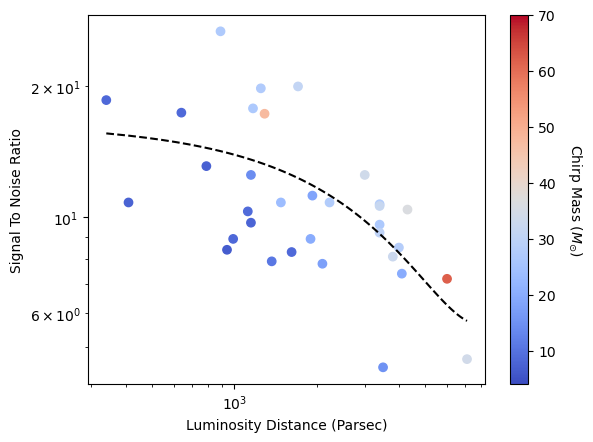

In [14]:
cm1 = plt.colormaps["coolwarm"]
min_O4_mass = min(O4_BBH["chirp_mass"])
sc = plt.scatter(O3_BBH["luminosity_distance"],O3_BBH["network_matched_filter_snr"], c = O3_BBH["chirp_mass"], cmap=cm1, vmin=min_O4_mass, vmax=70)

coefficients = np.polyfit(O3_BBH["luminosity_distance"],O3_BBH["network_matched_filter_snr"], 2)
fit_line_O3_BBH = np.poly1d(coefficients)
x = np.linspace(min(O3_BBH["luminosity_distance"]), max(O3_BBH["luminosity_distance"]), 100)
plt.plot(x, fit_line_O3_BBH(x), linestyle="--", color="black")

cbar = plt.colorbar(sc)
cbar.ax.get_yaxis().labelpad = 20
cbar.ax.set_ylabel('Chirp Mass ($M_{\odot}$)', rotation=270)
plt.yscale("log") 
plt.xscale("log") 
#plt.legend()
plt.xlabel("Luminosity Distance (Parsec)")
plt.ylabel("Signal To Noise Ratio")
plt.show()

In [15]:
#O4 = pd.read_csv("../Data/real_events_O4_ALL.csv")

In [16]:
print(len(O4))

82


In [17]:
"""
O4_BNS = pd.DataFrame(columns=O4.columns)
O4_BBH = pd.DataFrame(columns=O4.columns)

for index, row in O4.iterrows():
    if row["mass1"] < 2.16 or row["mass2"] < 2.16:
        O4_BNS = pd.concat([O4_BNS, pd.DataFrame([row])], ignore_index=True)
    if row["mass1"] >= 2.16 and row["mass2"] >= 2.16:
        O4_BBH = pd.concat([O4_BBH, pd.DataFrame([row])], ignore_index=True)

print(len(O4_BNS))
print(len(O4_BBH))
"""

'\nO4_BNS = pd.DataFrame(columns=O4.columns)\nO4_BBH = pd.DataFrame(columns=O4.columns)\n\nfor index, row in O4.iterrows():\n    if row["mass1"] < 2.16 or row["mass2"] < 2.16:\n        O4_BNS = pd.concat([O4_BNS, pd.DataFrame([row])], ignore_index=True)\n    if row["mass1"] >= 2.16 and row["mass2"] >= 2.16:\n        O4_BBH = pd.concat([O4_BBH, pd.DataFrame([row])], ignore_index=True)\n\nprint(len(O4_BNS))\nprint(len(O4_BBH))\n'

In [18]:
#O4_BBH_reduced = O4_BBH["snr"]/1.6 

In [19]:
#O4_BBH["predicted_luminosity_distance"] = fit_line_O3_BBH(O4_BBH["snr"])

In [20]:
"""
plt.scatter(np.log(O3_BBH["luminosity_distance"]), np.log(O3_BBH["network_matched_filter_snr"]), color = O3_BBH["color"])
#plt.scatter(O4_BBH["snr"], O4_BBH["predicted_luminosity_distance"], color = "black")

coefficients = np.polyfit(np.log(O3_BBH["network_matched_filter_snr"]),np.log(O3_BBH["luminosity_distance"]), 2)
fit_line_O3_BBH = np.poly1d(coefficients)
x = np.linspace(min(np.log(O3_BBH["network_matched_filter_snr"])), max(np.log(O3_BBH["network_matched_filter_snr"])), 100)
plt.plot(x, fit_line_O3_BBH(x), color="black")

plt.scatter([], [], color="red", label=": 2.16 - 7.92 $M_{\odot}$")
plt.scatter([], [], color="orange", label=": 7.92 - 15.84 $M_{\odot}$")
plt.scatter([], [], color="yellow", label=": 15.84 - 23.76 $M_{\odot}$")
plt.scatter([], [], color="green", label=": 23.76 - 31.68 $M_{\odot}$")
plt.scatter([], [], color="cyan", label=": 31.68 - 39.6 $M_{\odot}$")
plt.scatter([], [], color="indigo", label=": 39.6 - 47.52 $M_{\odot}$")
plt.scatter([], [], color="pink", label=": 47.52 - $M_{\odot}$")

plt.legend()
plt.ylabel("$log(SNR)$")
plt.xlabel("$log(D_L)$")
"""

'\nplt.scatter(np.log(O3_BBH["luminosity_distance"]), np.log(O3_BBH["network_matched_filter_snr"]), color = O3_BBH["color"])\n#plt.scatter(O4_BBH["snr"], O4_BBH["predicted_luminosity_distance"], color = "black")\n\ncoefficients = np.polyfit(np.log(O3_BBH["network_matched_filter_snr"]),np.log(O3_BBH["luminosity_distance"]), 2)\nfit_line_O3_BBH = np.poly1d(coefficients)\nx = np.linspace(min(np.log(O3_BBH["network_matched_filter_snr"])), max(np.log(O3_BBH["network_matched_filter_snr"])), 100)\nplt.plot(x, fit_line_O3_BBH(x), color="black")\n\nplt.scatter([], [], color="red", label=": 2.16 - 7.92 $M_{\\odot}$")\nplt.scatter([], [], color="orange", label=": 7.92 - 15.84 $M_{\\odot}$")\nplt.scatter([], [], color="yellow", label=": 15.84 - 23.76 $M_{\\odot}$")\nplt.scatter([], [], color="green", label=": 23.76 - 31.68 $M_{\\odot}$")\nplt.scatter([], [], color="cyan", label=": 31.68 - 39.6 $M_{\\odot}$")\nplt.scatter([], [], color="indigo", label=": 39.6 - 47.52 $M_{\\odot}$")\nplt.scatter([],

In [21]:
"""
plt.scatter(O3_BBH["luminosity_distance"],O3_BBH["network_matched_filter_snr"]/np.sqrt(O3_BBH["mass_1_source"]+O3_BBH["mass_2_source"]), color = O3_BBH["color"])
plt.scatter(O4_BBH["predicted_luminosity_distance"],O4_BBH["snr"]/np.sqrt(O4_BBH["mass1"]+O4_BBH["mass2"]), color = "black", label="predicted")

#coefficients = np.polyfit(O3_BBH["network_matched_filter_snr"],O3_BBH["luminosity_distance"], 2)
#fit_line_O3_BBH = np.poly1d(coefficients)
#x = np.linspace(min(O3_BBH["network_matched_filter_snr"]), max(O3_BBH["network_matched_filter_snr"]), 100)
#plt.plot(fit_line_O3_BBH(x), x, color="black")

plt.scatter([], [], color="red", label=": 2.16 - 7.92 $M_{\odot}$")
plt.scatter([], [], color="orange", label=": 7.92 - 15.84 $M_{\odot}$")
plt.scatter([], [], color="yellow", label=": 15.84 - 23.76 $M_{\odot}$")
plt.scatter([], [], color="green", label=": 23.76 - 31.68 $M_{\odot}$")
plt.scatter([], [], color="cyan", label=": 31.68 - 39.6 $M_{\odot}$")
plt.scatter([], [], color="indigo", label=": 39.6 - 47.52 $M_{\odot}$")
plt.scatter([], [], color="pink", label=": 47.52 - $M_{\odot}$")

plt.legend()
plt.xlabel("$D_L$")
plt.ylabel("SNR")
"""

'\nplt.scatter(O3_BBH["luminosity_distance"],O3_BBH["network_matched_filter_snr"]/np.sqrt(O3_BBH["mass_1_source"]+O3_BBH["mass_2_source"]), color = O3_BBH["color"])\nplt.scatter(O4_BBH["predicted_luminosity_distance"],O4_BBH["snr"]/np.sqrt(O4_BBH["mass1"]+O4_BBH["mass2"]), color = "black", label="predicted")\n\n#coefficients = np.polyfit(O3_BBH["network_matched_filter_snr"],O3_BBH["luminosity_distance"], 2)\n#fit_line_O3_BBH = np.poly1d(coefficients)\n#x = np.linspace(min(O3_BBH["network_matched_filter_snr"]), max(O3_BBH["network_matched_filter_snr"]), 100)\n#plt.plot(fit_line_O3_BBH(x), x, color="black")\n\nplt.scatter([], [], color="red", label=": 2.16 - 7.92 $M_{\\odot}$")\nplt.scatter([], [], color="orange", label=": 7.92 - 15.84 $M_{\\odot}$")\nplt.scatter([], [], color="yellow", label=": 15.84 - 23.76 $M_{\\odot}$")\nplt.scatter([], [], color="green", label=": 23.76 - 31.68 $M_{\\odot}$")\nplt.scatter([], [], color="cyan", label=": 31.68 - 39.6 $M_{\\odot}$")\nplt.scatter([], [],

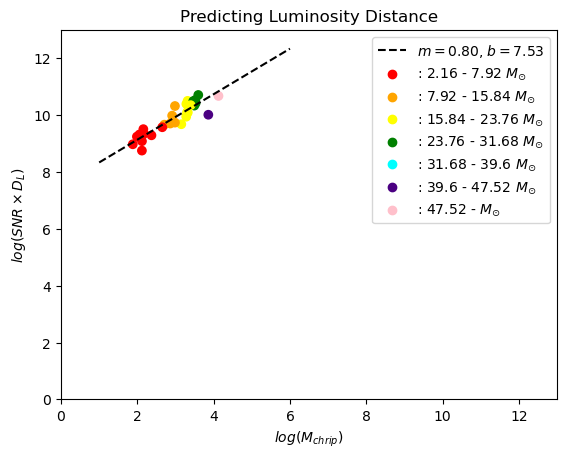

slope: 0.8003270810708438
intercept: 7.534448682703253


In [22]:
sub_O3_BBH = O3_BBH[(O3_BBH["chirp_mass_source"] != 7.49)] #& (O3_BBH["chirp_mass_source"] != 47.5)]

plt.scatter(np.log(sub_O3_BBH["chirp_mass_source"]), np.log(sub_O3_BBH["luminosity_distance"] * sub_O3_BBH["network_matched_filter_snr"]), color = sub_O3_BBH["color"])

coefficients = np.polyfit(np.log(sub_O3_BBH["chirp_mass_source"]), np.log(sub_O3_BBH["luminosity_distance"] * sub_O3_BBH["network_matched_filter_snr"]), 1)
m, b = coefficients
fit_line_O3_BBH = np.poly1d(coefficients)
x = np.linspace(1, 6, 100)
plt.plot(x, fit_line_O3_BBH(x), color="black", linestyle="--", label=f"$m={m:.2f}$, $b={b:.2f}$")

plt.scatter([], [], color="red", label=": 2.16 - 7.92 $M_{\odot}$")
plt.scatter([], [], color="orange", label=": 7.92 - 15.84 $M_{\odot}$")
plt.scatter([], [], color="yellow", label=": 15.84 - 23.76 $M_{\odot}$")
plt.scatter([], [], color="green", label=": 23.76 - 31.68 $M_{\odot}$")
plt.scatter([], [], color="cyan", label=": 31.68 - 39.6 $M_{\odot}$")
plt.scatter([], [], color="indigo", label=": 39.6 - 47.52 $M_{\odot}$")
plt.scatter([], [], color="pink", label=": 47.52 - $M_{\odot}$")

plt.legend()
plt.title("Predicting Luminosity Distance")
plt.ylim((0,13))
plt.xlim((0,13))
plt.ylabel("$log(SNR\\times D_L)$")
plt.xlabel("$log(M_{chrip})$")
plt.show()

m, b = coefficients
print(f"slope: {m}")
print(f"intercept: {b}")

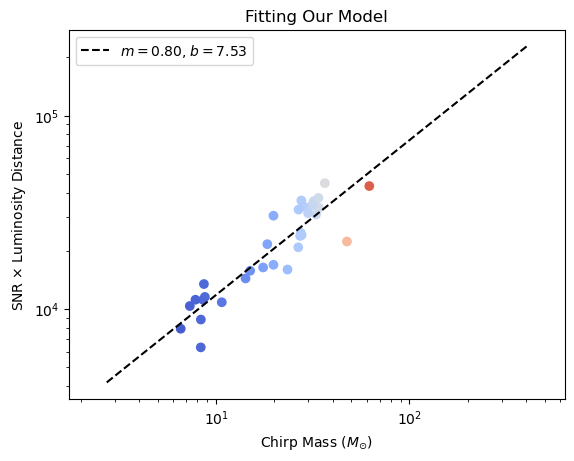

slope: 0.8003270810708438
intercept: 7.534448682703253


In [23]:
sub_O3_BBH = O3_BBH[(O3_BBH["chirp_mass_source"] != 7.49)] #& (O3_BBH["chirp_mass_source"] != 47.5)]

plt.scatter(sub_O3_BBH["chirp_mass_source"], sub_O3_BBH["luminosity_distance"] * sub_O3_BBH["network_matched_filter_snr"], c=sub_O3_BBH["chirp_mass_source"], cmap=cm1, vmin=min_O4_mass, vmax=70)

coefficients = np.polyfit(np.log(sub_O3_BBH["chirp_mass_source"]), np.log(sub_O3_BBH["luminosity_distance"] * sub_O3_BBH["network_matched_filter_snr"]), 1)
m, b = coefficients
fit_line_O3_BBH = np.poly1d(coefficients)
x = np.linspace(1, 6, 100)
plt.plot(np.e ** x, np.e ** fit_line_O3_BBH(x), color="black", linestyle="--", label=f"$m={m:.2f}$, $b={b:.2f}$")

plt.title("Fitting Our Model")
plt.legend()
plt.yscale("log")
plt.xscale("log")
plt.axis('equal')
plt.ylabel("SNR $\\times$ Luminosity Distance")
plt.xlabel("Chirp Mass ($M_{\odot}$)")
plt.show()

m, b = coefficients
print(f"slope: {m}")
print(f"intercept: {b}")

$SNR=k(M_{chrip})\times D^{-1}_L$

$k(M_{chrip})=(const)M^{m}_{chirp}$

$ln(SNR\times D_L)\approx m\times ln(M_{chrip}) + b$

$D_L\approx \frac{M^{m}_{chrip}}{SNR}e^b$ (Probably didn't need this step)

$D_L\approx (const)\frac{M^{m}_{chrip}}{SNR}$

$c$ : noise reduction factor (converts SNR between observation groups)

$ln(D_L)\approx m\times ln(M_{chrip}) - ln(SNR) - ln(c) + b$

In [24]:
O3_BBH.head()

,name,simple_name,catalog,confidence,version,group_name,group,gps,far,snr,...,is_O3,mass_1_source,mass_2_source,network_matched_filter_snr,chi_eff,chirp_mass_source,combined_far,p_astro,M_tot,color
0,GW200322_091133-v1,GW200322,confident,3,1,O3,3,1.268904e+09,140.00000,4.5,...,True,38.0,11.3,4.5,0.27,15.00,140.00000,0.61501,49.3,orange
1,GW200316_215756-v1,GW200316,confident,3,1,O3,3,1.268431e+09,0.00001,10.3,...,True,13.1,7.8,10.3,0.13,8.75,0.00001,0.99000,20.9,red
2,GW200311_115853-v1,GW200311,confident,3,1,O3,3,1.267963e+09,0.00001,17.8,...,True,34.2,27.7,17.8,-0.02,26.60,0.00001,0.99000,61.9,yellow
3,GW200308_173609-v1,GW200308,confident,3,1,O3,3,1.267724e+09,2.40000,4.7,...,True,60.0,24.0,4.7,0.16,34.00,2.40000,0.85660,84.0,green
4,GW200306_093714-v1,GW200306,confident,3,1,O3,3,1.267523e+09,24.00000,7.8,...,True,28.3,14.8,7.8,0.32,17.50,24.00000,0.81156,43.1,orange


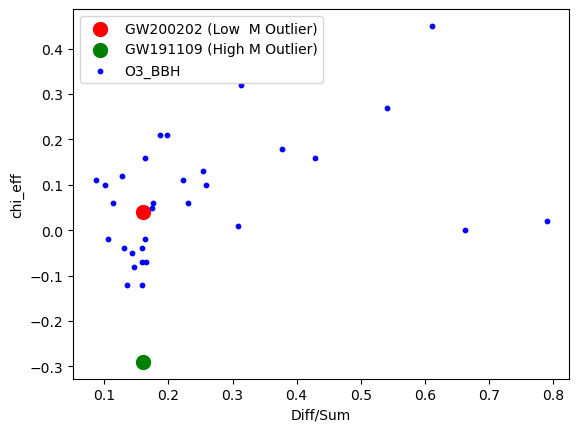

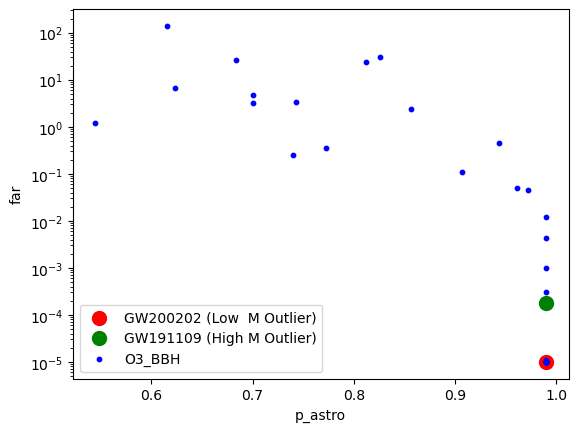

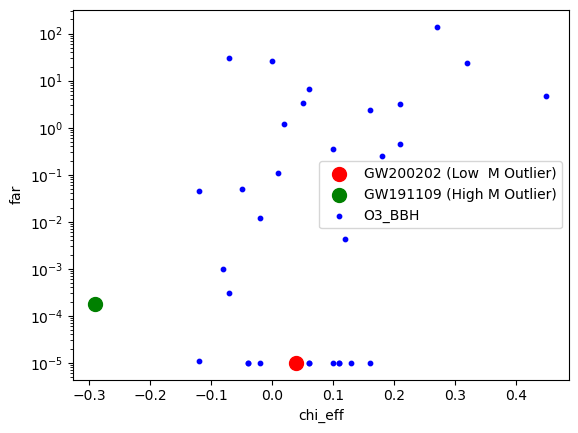

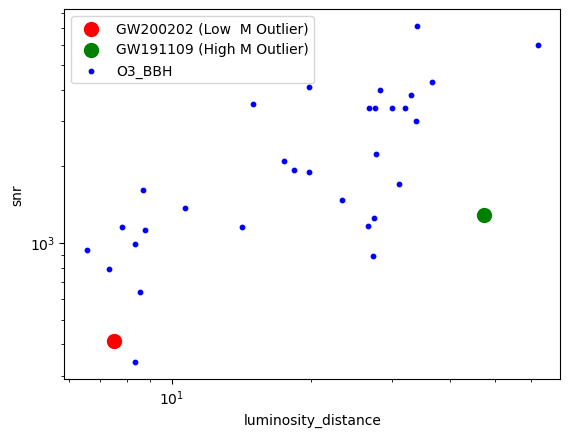

In [25]:
GW200202 = O3_BBH[O3_BBH["simple_name"] == "GW200202"]
GW191109 = O3_BBH[O3_BBH["simple_name"] == "GW191109"]
O3_BBH_df = O3_BBH[(O3_BBH["simple_name"] != "GW200202") & (O3_BBH["simple_name"] != "GW191109")]

def scatter_1(df, c, label, s):
    plt.scatter(np.abs(df["mass_1_source"] - df["mass_2_source"]) / (df["M_tot"]), df["chi_eff"], s=s, color = c, label=label)

scatter_1(GW200202, "r", "GW200202 (Low  M Outlier)", 100)
scatter_1(GW191109, "g", "GW191109 (High M Outlier)", 100)
scatter_1(O3_BBH_df, "b", "O3_BBH", 10)

plt.legend()
plt.ylabel("chi_eff")
plt.xlabel("Diff/Sum")
plt.show()

def scatter_2(df, c, label, s):
    plt.scatter(df["p_astro"], df["far"], s=s, color = c, label=label)

scatter_2(GW200202, "r", "GW200202 (Low  M Outlier)", 100)
scatter_2(GW191109, "g", "GW191109 (High M Outlier)", 100)
scatter_2(O3_BBH_df, "b", "O3_BBH", 10)

plt.legend()
plt.ylabel("far")
plt.yscale("log") 
plt.xlabel("p_astro")
#plt.xscale("log")
plt.show()

def scatter_3(df, c, label, s):
    plt.scatter(df["chi_eff"], df["far"], s=s, color = c, label=label)

scatter_3(GW200202, "r", "GW200202 (Low  M Outlier)", 100)
scatter_3(GW191109, "g", "GW191109 (High M Outlier)", 100)
scatter_3(O3_BBH_df, "b", "O3_BBH", 10)

plt.legend()
plt.ylabel("far")
plt.yscale("log") 
plt.xlabel("chi_eff")
#plt.xscale("log")
plt.show()

def scatter_4(df, c, label, s):
    plt.scatter(df["chirp_mass_source"], df["luminosity_distance"], s=s, color = c, label=label)

scatter_4(GW200202, "r", "GW200202 (Low  M Outlier)", 100)
scatter_4(GW191109, "g", "GW191109 (High M Outlier)", 100)
scatter_4(O3_BBH_df, "b", "O3_BBH", 10)

plt.legend()
plt.ylabel("snr")
plt.yscale("log") 
plt.xlabel("luminosity_distance")
plt.xscale("log")
plt.show()

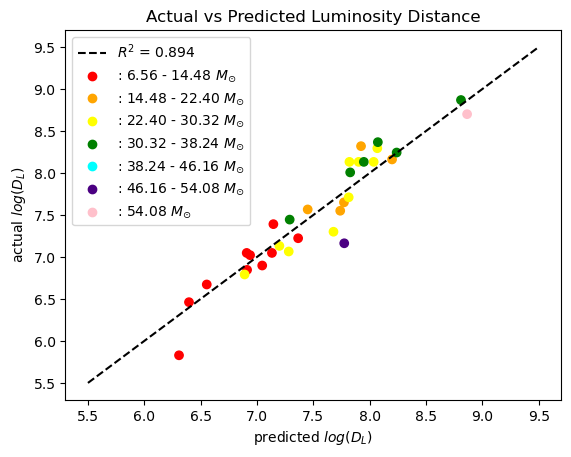

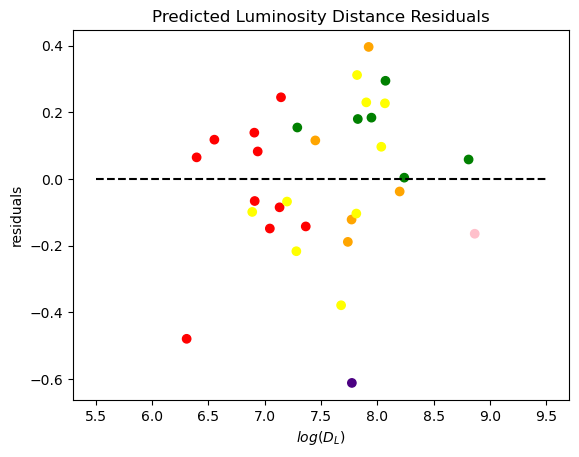

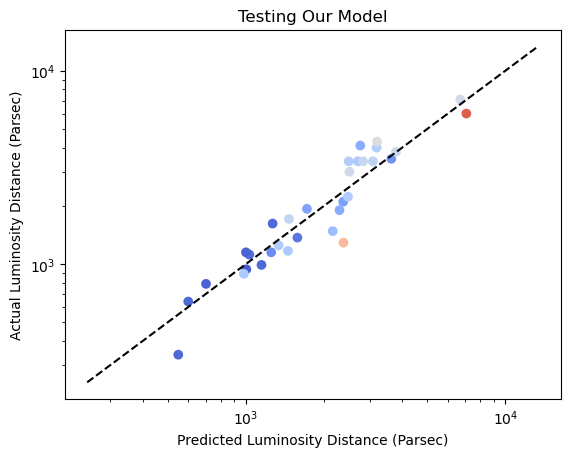

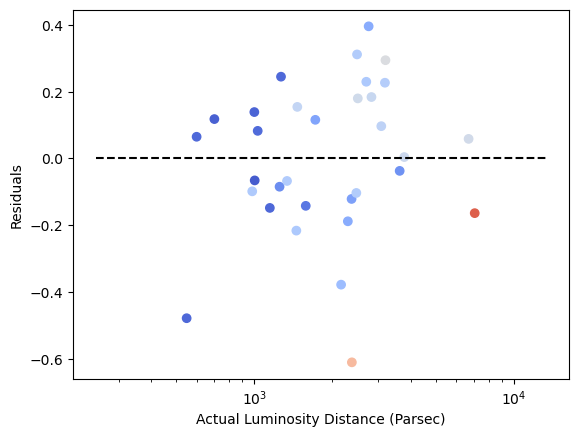

C:\Users\lucas\AppData\Local\Temp\ipykernel_19036\2686402883.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  O3_BBH_df["residuals"] = np.log(O3_BBH_df["luminosity_distance"]) - predicted_luminosity_distances


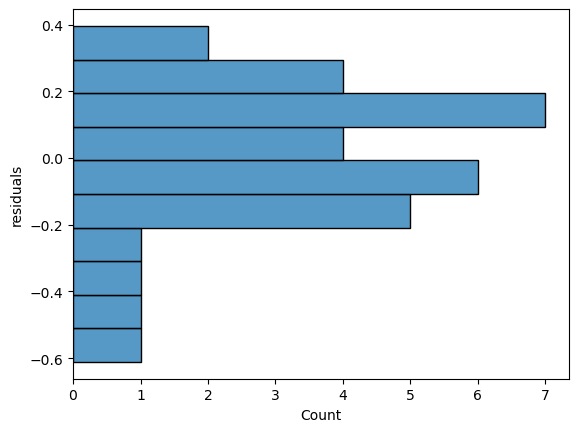

slope: 0.8003270810708438
intercept: 7.534448682703253


In [26]:
O3_BBH_df = O3_BBH[(O3_BBH["simple_name"] != "GW200202")] #& (O3_BBH["simple_name"] != "GW191109")]

predicted_luminosity_distances = m * np.log(O3_BBH_df["chirp_mass_source"]) - np.log(O3_BBH_df["network_matched_filter_snr"]) + b

plt.scatter(predicted_luminosity_distances,np.log(O3_BBH_df["luminosity_distance"]), color = O3_BBH_df["color"])

x = np.linspace(5.5, 9.5, 10)
plt.plot(x,x, color = "black", linestyle="--", label="$R^2$ = {:.3f}".format(r2_score(np.log(O3_BBH_df["luminosity_distance"]), predicted_luminosity_distances)))

for i in range(n_O3_BBH):
    if i == n_O3_BBH - 1:
        plt.scatter([], [], color=O3_colors[i], label=f": {O3_min_chirp_mass + O3_mass_val * i:.2f} " + "$M_{\odot}$")
    else:
        plt.scatter([], [], color=O3_colors[i], label=f": {O3_min_chirp_mass + O3_mass_val * i:.2f} - {O3_min_chirp_mass + O3_mass_val * (i + 1):.2f} " + "$M_{\odot}$")
"""
plt.scatter([], [], color="red", label=": 2.16 - 7.92 $M_{\odot}$")
plt.scatter([], [], color="orange", label=": 7.92 - 15.84 $M_{\odot}$")
plt.scatter([], [], color="yellow", label=": 15.84 - 23.76 $M_{\odot}$")
plt.scatter([], [], color="green", label=": 23.76 - 31.68 $M_{\odot}$")
plt.scatter([], [], color="cyan", label=": 31.68 - 39.6 $M_{\odot}$")
plt.scatter([], [], color="indigo", label=": 39.6 - 47.52 $M_{\odot}$")
plt.scatter([], [], color="pink", label=": 47.52 - $M_{\odot}$")
"""

plt.legend()
plt.title("Actual vs Predicted Luminosity Distance")
plt.ylabel("actual $log(D_L)$")
plt.xlabel("predicted $log(D_L)$")
plt.show()

x = np.linspace(5.5, 9.5, 10)
plt.plot(x,np.zeros(10), color = "black", linestyle="--", label="$R^2$ = {:.3f}".format(r2_score(np.log(O3_BBH_df["luminosity_distance"]), predicted_luminosity_distances)))
plt.scatter(predicted_luminosity_distances,np.log(O3_BBH_df["luminosity_distance"]) - predicted_luminosity_distances, color = O3_BBH_df["color"])
plt.title("Predicted Luminosity Distance Residuals")
plt.ylabel("residuals")
plt.xlabel("$log(D_L)$")
plt.show()

# New Plots
plt.scatter(np.e ** predicted_luminosity_distances,O3_BBH_df["luminosity_distance"], c = O3_BBH_df["chirp_mass"], cmap=cm1, vmin=min_O4_mass, vmax=70)

x = np.e ** np.linspace(5.5, 9.5, 10)
plt.plot(x,x, color = "black", linestyle="--", label="$R^2$ = {:.3f}".format(r2_score(np.log(O3_BBH_df["luminosity_distance"]), predicted_luminosity_distances)))
#plt.axis('equal')
plt.title("Testing Our Model")
plt.ylabel("Actual Luminosity Distance (Parsec)")
plt.yscale("log")
plt.xlabel("Predicted Luminosity Distance (Parsec)")
plt.xscale("log")
plt.show()

x = np.e ** np.linspace(5.5, 9.5, 10)
plt.plot(x,np.zeros(10), color = "black", linestyle="--", label="$R^2$ = {:.3f}".format(r2_score(np.log(O3_BBH_df["luminosity_distance"]), predicted_luminosity_distances)))
plt.scatter(np.e ** predicted_luminosity_distances,np.log(O3_BBH_df["luminosity_distance"]) - predicted_luminosity_distances, c = O3_BBH_df["chirp_mass"], cmap=cm1, vmin=min_O4_mass, vmax=70)
plt.ylabel("Residuals")
plt.xlabel("Actual Luminosity Distance (Parsec)")
plt.xscale("log")

plt.show()
# New Plots

O3_BBH_df["residuals"] = np.log(O3_BBH_df["luminosity_distance"]) - predicted_luminosity_distances

sns.histplot(O3_BBH_df, bins = 10, y="residuals") # you may select the no. of bins  
plt.show()

m, b = coefficients
print(f"slope: {m}")
print(f"intercept: {b}")

In the above fit GW200202 and GW191109 are removed.

Predicting luminosity distance in O4 data

$ln(D_L)\approx m\times ln(M_{chrip}) - ln(SNR) - ln(c) + b$

$D_L\approx \frac{1}{c}\frac{M^{m}_{chrip}}{SNR}e^b$

In [27]:
SNR_scale_factor = 1.6

def predict_luminosity_distance(df, m, b, c):
    return (np.e ** b) * (df['chirp_mass'] ** m) / (c * df['snr'])

O4_BBH['luminosity_distance'] = predict_luminosity_distance(O4_BBH, m, b, SNR_scale_factor)

C:\Users\lucas\AppData\Local\Temp\ipykernel_19036\1386165765.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  O4_BBH['luminosity_distance'] = predict_luminosity_distance(O4_BBH, m, b, SNR_scale_factor)


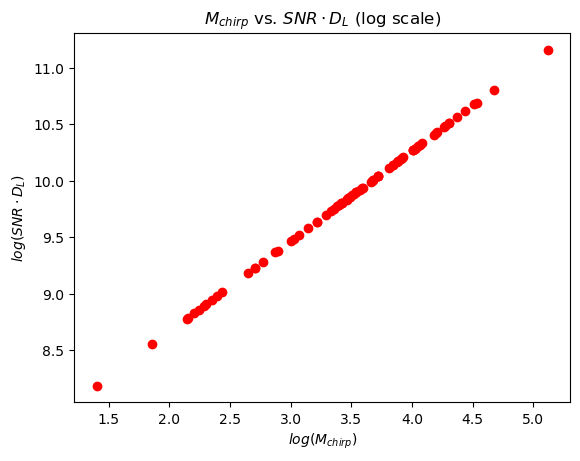

In [28]:
plt.scatter(np.log(O4_BBH["chirp_mass"]), np.log(O4_BBH["snr"] * O4_BBH["luminosity_distance"]), color = "red", label="O4")
plt.title("$M_{chirp}$ vs. $SNR\cdot D_L$ (log scale)")
plt.xlabel("$log(M_{chirp})$")
plt.ylabel("$log(SNR\cdot D_L)$")
plt.show()

In [29]:
#cm1 = LinearSegmentedColormap.from_list("O3cmap", ["skyblue", "dodgerblue","purple"])
cm1 = LinearSegmentedColormap.from_list("O3cmap", ["skyblue", "dodgerblue", "purple","black"])
cm2 = LinearSegmentedColormap.from_list("O4cmap", ["gold","orange","darkred"])

In [30]:
sub_O4_BBH = O4_BBH[O4_BBH['chirp_mass'] < 140]

max_mass = max(sub_O4_BBH["chirp_mass"])
min_mass = min(sub_O4_BBH["chirp_mass"])

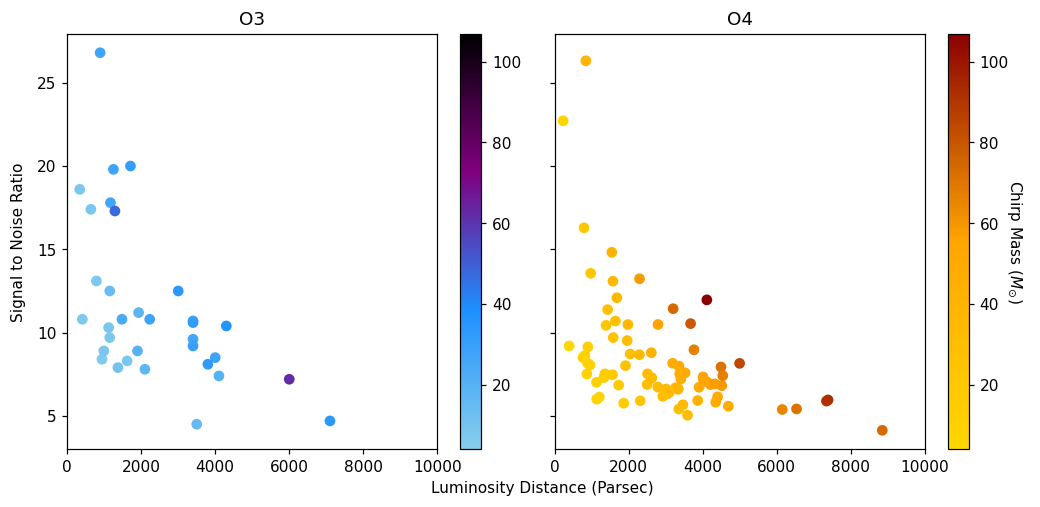

'\nfig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), dpi=110, sharex=True, sharey=True)\nfig.add_subplot(111, frameon=False)\n\nsc = ax1.scatter(O3_BBH["luminosity_distance"], O3_BBH["snr"], c = O3_BBH["chirp_mass"], cmap=cm1, vmin=min_mass, vmax=max_mass)\nplt.colorbar(sc, ax=ax1)\nax1.set_title("O3")\nax1.set_xscale("log")\nax1.set_xlim(min(sub_O4_BBH["luminosity_distance"]) * 0.8, max(sub_O4_BBH["luminosity_distance"]) * 1.2)\nsc = ax2.scatter(sub_O4_BBH["luminosity_distance"], sub_O4_BBH["snr"], c = sub_O4_BBH["chirp_mass"], cmap=cm2, vmin=min_mass, vmax=max_mass)\nplt.colorbar(sc, ax=ax2)\nax2.set_title("O4")\nax2.set_xlim(min(sub_O4_BBH["luminosity_distance"]) * 0.8, max(sub_O4_BBH["luminosity_distance"]) * 1.2)\n\nplt.tick_params(labelcolor=\'none\', which=\'both\', top=False, bottom=False, left=False, right=False)\nplt.xlabel("Luminosity Distance (Parsec)")\nplt.ylabel("Signal to Noise Ratio")\nplt.tight_layout()\nplt.show()\n'

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), dpi=110, sharex=True, sharey=True)
fig.add_subplot(111, frameon=False)

sub_O4_BBH = O4_BBH[(O4_BBH['chirp_mass'] < 140) & (O4_BBH['snr'] < 35)]

max_mass = max(sub_O4_BBH["chirp_mass"])
min_mass = min(sub_O4_BBH["chirp_mass"])
sc = ax1.scatter(O3_BBH["luminosity_distance"], O3_BBH["snr"], c = O3_BBH["chirp_mass"], cmap=cm1, vmin=min_mass, vmax=max_mass)
cbar1 = plt.colorbar(sc, ax=ax1)
ax1.set_title("O3")
ax1.set_xlim(0, 10000)

sc = ax2.scatter(sub_O4_BBH["luminosity_distance"], sub_O4_BBH["snr"], c = sub_O4_BBH["chirp_mass"], cmap=cm2, vmin=min_mass, vmax=max_mass)
cbar2 = plt.colorbar(sc, ax=ax2)
ax2.set_title("O4")
ax2.set_xlim(0, 10000)

cbar2.ax.get_yaxis().labelpad = 10
cbar2.ax.set_ylabel('Chirp Mass ($M_{\odot}$)', rotation=270)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel("Luminosity Distance (Parsec)")
plt.ylabel("Signal to Noise Ratio")
plt.tight_layout()
plt.show()

# log scale

"""
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), dpi=110, sharex=True, sharey=True)
fig.add_subplot(111, frameon=False)

sc = ax1.scatter(O3_BBH["luminosity_distance"], O3_BBH["snr"], c = O3_BBH["chirp_mass"], cmap=cm1, vmin=min_mass, vmax=max_mass)
plt.colorbar(sc, ax=ax1)
ax1.set_title("O3")
ax1.set_xscale("log")
ax1.set_xlim(min(sub_O4_BBH["luminosity_distance"]) * 0.8, max(sub_O4_BBH["luminosity_distance"]) * 1.2)
sc = ax2.scatter(sub_O4_BBH["luminosity_distance"], sub_O4_BBH["snr"], c = sub_O4_BBH["chirp_mass"], cmap=cm2, vmin=min_mass, vmax=max_mass)
plt.colorbar(sc, ax=ax2)
ax2.set_title("O4")
ax2.set_xlim(min(sub_O4_BBH["luminosity_distance"]) * 0.8, max(sub_O4_BBH["luminosity_distance"]) * 1.2)

plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel("Luminosity Distance (Parsec)")
plt.ylabel("Signal to Noise Ratio")
plt.tight_layout()
plt.show()
"""

C:\Users\lucas\AppData\Local\Temp\ipykernel_19036\981597881.py:11: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 10000)


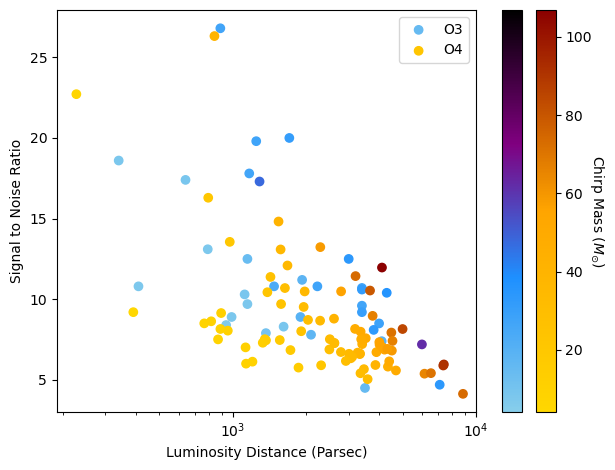

In [32]:
scale = "log"

sc1 = plt.scatter(O3_BBH["luminosity_distance"], O3_BBH["snr"], c = O3_BBH["chirp_mass"], cmap=cm1, vmin=min_mass, vmax=max_mass, label="O3")

sc2 = plt.scatter(sub_O4_BBH["luminosity_distance"], sub_O4_BBH["snr"], c = sub_O4_BBH["chirp_mass"], cmap=cm2, vmin=min_mass, vmax=max_mass, label="O4")
cbar2 = plt.colorbar(sc2, pad=-0.08)
cbar1 = plt.colorbar(sc1)
cbar1.set_ticks([])

plt.xscale(scale)
plt.xlim(0, 10000)

cbar2.ax.get_yaxis().labelpad = 10
cbar2.ax.set_ylabel('Chirp Mass ($M_{\odot}$)', rotation=270)
plt.legend()
plt.xlabel("Luminosity Distance (Parsec)")
plt.ylabel("Signal to Noise Ratio")
plt.tight_layout()
plt.show()

C:\Users\lucas\AppData\Local\Temp\ipykernel_19036\457741829.py:17: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax1.set_xlim(0, 10000)
C:\Users\lucas\AppData\Local\Temp\ipykernel_19036\457741829.py:23: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax2.set_xlim(0, 10000)


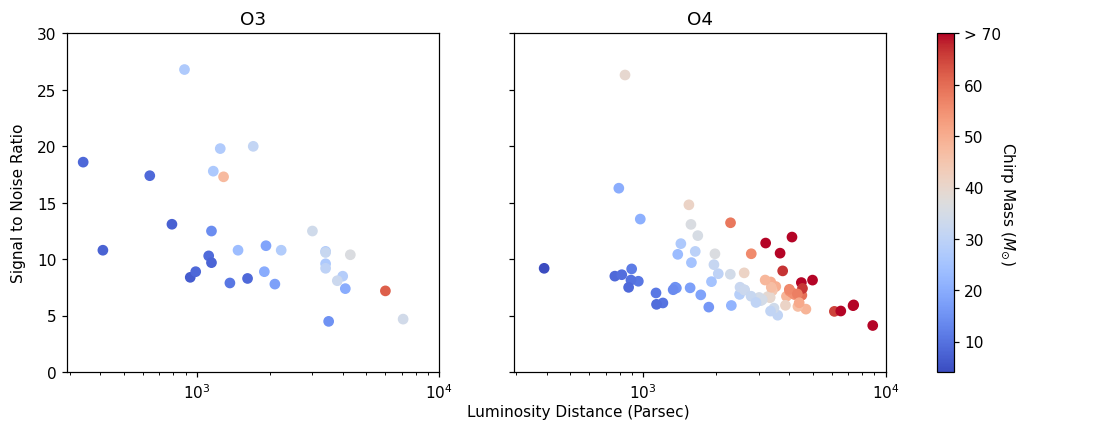

In [33]:
fig, axs = plt.subplots(1, 2, figsize=(12,4), dpi=110, sharex=True, sharey=True)
ax1, ax2 = axs
fig.add_subplot(111, frameon=False)
cmmass = plt.colormaps["coolwarm"]

sub_O4_BBH = O4_BBH[(O4_BBH['chirp_mass'] < 140) & (O4_BBH['snr'] < 35)]

scale = "log"

max_mass = max(O4_BBH["chirp_mass"])
min_mass = min(O4_BBH["chirp_mass"])
vmax=70
ax1.scatter(O3_BBH["luminosity_distance"], O3_BBH["snr"], c = O3_BBH["chirp_mass"], cmap=cmmass, vmin=min_mass, vmax=vmax)
ax1.set_title("O3")
ax2.set_xscale(scale)
ax1.set_ylim(0, 30)
ax1.set_xlim(0, 10000)

sc = ax2.scatter(sub_O4_BBH["luminosity_distance"], sub_O4_BBH["snr"], c = sub_O4_BBH["chirp_mass"], cmap=cmmass, vmin=min_mass, vmax=vmax)
ax2.set_title("O4")
ax2.set_xscale(scale)
ax2.set_ylim(0, 30)
ax2.set_xlim(0, 10000)

# colorbar
ticks = list(range(10, vmax + 1, 10))
cbar = plt.colorbar(sc, ax=axs, ticks=ticks)
cbar.ax.set_yticklabels([str(t) for t in ticks[0:-1]] + [f"> {ticks[-1]}"])
cbar.ax.get_yaxis().labelpad = 10
cbar.ax.set_ylabel('Chirp Mass ($M_{\odot}$)', rotation=270)

plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel("Luminosity Distance (Parsec)")
plt.ylabel("Signal to Noise Ratio")
plt.show()

AttributeError: 'Axes' object has no attribute 'set_scale'

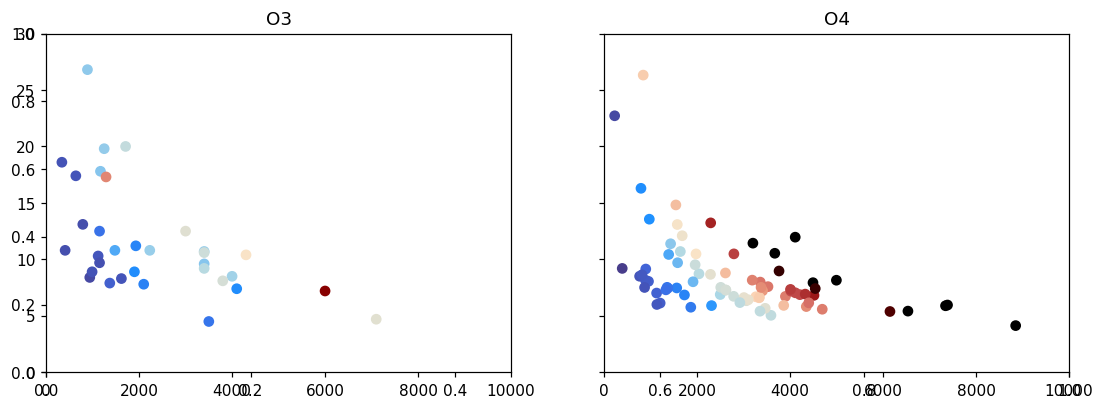

In [34]:
fig, axs = plt.subplots(1, 2, figsize=(12,4), dpi=110, sharex=True, sharey=True)
ax1, ax2 = axs
fig.add_subplot(111, frameon=False)
cmmass = LinearSegmentedColormap.from_list("cmmass", ["darkslateblue", "royalblue", "dodgerblue", "lightblue", "bisque", "darksalmon", "indianred", "darkred", "black"])#plt.colormaps["coolwarm"]

sub_O4_BBH = O4_BBH[(O4_BBH['chirp_mass'] < 140) & (O4_BBH['snr'] < 35)]

max_mass = max(O4_BBH["chirp_mass"])
min_mass = min(O4_BBH["chirp_mass"])
vmax=70
ax1.scatter(O3_BBH["luminosity_distance"], O3_BBH["snr"], c = O3_BBH["chirp_mass"], cmap=cmmass, vmin=min_mass, vmax=vmax)
ax1.set_title("O3")
ax1.set_ylim(0, 30)
ax1.set_xlim(0, 10000)

sc = ax2.scatter(sub_O4_BBH["luminosity_distance"], sub_O4_BBH["snr"], c = sub_O4_BBH["chirp_mass"], cmap=cmmass, vmin=min_mass, vmax=vmax)
ax2.set_title("O4")
ax2.set_scale("log")
ax2.set_ylim(0, 30)
ax2.set_xlim(0, 10000)

# colorbar
ticks = list(range(10, vmax + 1, 10))
cbar = plt.colorbar(sc, ax=axs, ticks=ticks)
cbar.ax.set_yticklabels([str(t) for t in ticks[0:-1]] + [f"> {ticks[-1]}"])
cbar.ax.get_yaxis().labelpad = 10
cbar.ax.set_ylabel('Chirp Mass ($M_{\odot}$)', rotation=270)

plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel("Luminosity Distance (Parsec)")
plt.ylabel("Signal to Noise Ratio")
plt.show()

In [ ]:
fig, axs = plt.subplots(2, dpi=180, sharex=True, sharey=True)
ax1, ax2 = axs
fig.add_subplot(111, frameon=False)
cmmass = plt.colormaps["coolwarm"]#LinearSegmentedColormap.from_list("cmmass", ["darkslateblue", "royalblue", "dodgerblue", "lightblue", "bisque", "darksalmon", "indianred", "darkred", "black"])

sub_O4_BBH = O4_BBH[(O4_BBH['chirp_mass'] < 140) & (O4_BBH['snr'] < 35)]

scale = 'log'

max_mass = max(O4_BBH["chirp_mass"])
min_mass = min(O4_BBH["chirp_mass"])
vmax=70
ax1.scatter(O3_BBH["luminosity_distance"], O3_BBH["snr"], c = O3_BBH["chirp_mass"], cmap=cmmass, vmin=min_mass, vmax=vmax)
ax1.set_title("O3")
ax1.set_xscale(scale)
ax1.set_ylim(0, 30)
ax1.set_xlim(0, 10000)

sc = ax2.scatter(sub_O4_BBH["luminosity_distance"], sub_O4_BBH["snr"], c = sub_O4_BBH["chirp_mass"], cmap=cmmass, vmin=min_mass, vmax=vmax)
ax2.set_title("O4")
ax2.set_xscale(scale)
ax2.set_ylim(0, 30)
ax2.set_xlim(0, 10000)

# colorbar
ticks = list(range(10, vmax + 1, 10))
cbar = plt.colorbar(sc, ax=axs, ticks=ticks)
cbar.ax.set_yticklabels([str(t) for t in ticks[0:-1]] + [f"> {ticks[-1]}"])
cbar.ax.get_yaxis().labelpad = 10
cbar.ax.set_ylabel('Chirp Mass ($M_{\odot}$)', rotation=270)

plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel("Luminosity Distance (Parsec)")
plt.ylabel("Signal to Noise Ratio")
plt.show()

In [ ]:
cm1 = LinearSegmentedColormap.from_list("O3cmap", ["skyblue", "dodgerblue","purple"])
cm2 = LinearSegmentedColormap.from_list("O4cmap", ["gold","orange","darkred"])

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), dpi=110, sharey=True)

sub_O4_BBH = O4_BBH[O4_BBH['chirp_mass'] < 140]

max_mass = max(O3_BBH["chirp_mass"])
min_mass = min(sub_O4_BBH["chirp_mass"])
sc = ax1.scatter(O3_BBH["luminosity_distance"], O3_BBH["snr"], c = O3_BBH["chirp_mass"], cmap=cm1, vmin=min_mass, vmax=max_mass)
plt.colorbar(sc, ax=ax1)
ax1.set_title("O3")
ax1.set_xlabel("Luminosity Distance (Parsec)")
ax1.set_ylabel("Signal to Noise Ratio")
ax1.set_xlim(0, 10000)

sc = ax2.scatter(sub_O4_BBH["luminosity_distance"], sub_O4_BBH["snr"], c = sub_O4_BBH["chirp_mass"], cmap=cm2, vmin=min_mass, vmax=max_mass)
plt.colorbar(sc, ax=ax2)
ax2.set_title("O4")
ax2.set_xlabel("$D_L$")
ax2.set_xlim(0, 10000)

plt.tight_layout()
plt.show()

# log scale

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), dpi=110, sharey=True)

sc = ax1.scatter(O3_BBH["luminosity_distance"], O3_BBH["snr"], c = O3_BBH["chirp_mass"], cmap=cm1, vmin=min_mass, vmax=max_mass)
plt.colorbar(sc, ax=ax1)
ax1.set_title("O3")
ax1.set_xscale("log")
ax1.set_xlabel("Luminosity Distance (Parsec)")
ax1.set_ylabel("Signal to Noise Ratio")
ax1.set_xlim(min(sub_O4_BBH["luminosity_distance"]) * 0.8, max(sub_O4_BBH["luminosity_distance"]) * 1.2)
sc = ax2.scatter(sub_O4_BBH["luminosity_distance"], sub_O4_BBH["snr"], c = sub_O4_BBH["chirp_mass"], cmap=cm2, vmin=min_mass, vmax=max_mass)
plt.colorbar(sc, ax=ax2)
ax2.set_title("O4")
ax2.set_xscale("log")
ax2.set_xlabel("$Luminosity Distance (Parsec)$")
ax2.set_xlim(min(sub_O4_BBH["luminosity_distance"]) * 0.8, max(sub_O4_BBH["luminosity_distance"]) * 1.2)

plt.tight_layout()
plt.show()

In [ ]:
"""
plt.scatter(np.log(sub_O3_BBH["chirp_mass_source"]), np.log(sub_O3_BBH["redshift"] * sub_O3_BBH["network_matched_filter_snr"]), color = sub_O3_BBH["color"])

coefficients = np.polyfit(np.log(sub_O3_BBH["chirp_mass_source"]), np.log(sub_O3_BBH["redshift"] * sub_O3_BBH["network_matched_filter_snr"]), 1)
m, b = coefficients
fit_line_O3_BBH = np.poly1d(coefficients)
x = np.linspace(1, 6, 100)
plt.plot(x, fit_line_O3_BBH(x), color="black", linestyle="--", label=f"$m={m:.2f}$, $b={b:.2f}$")

plt.scatter([], [], color="red", label=": 2.16 - 7.92 $M_{\odot}$")
plt.scatter([], [], color="orange", label=": 7.92 - 15.84 $M_{\odot}$")
plt.scatter([], [], color="yellow", label=": 15.84 - 23.76 $M_{\odot}$")
plt.scatter([], [], color="green", label=": 23.76 - 31.68 $M_{\odot}$")
plt.scatter([], [], color="cyan", label=": 31.68 - 39.6 $M_{\odot}$")
plt.scatter([], [], color="indigo", label=": 39.6 - 47.52 $M_{\odot}$")
plt.scatter([], [], color="pink", label=": 47.52 - $M_{\odot}$")

plt.legend()
plt.title("Predicting Redshift")
plt.ylim((0,6))
plt.xlim((0,6))
plt.ylabel("$log(SNR\\times z)$")
plt.xlabel("$log(M_{chrip})$")
plt.show()

m, b = coefficients
print(f"slope: {m}")
print(f"intercept: {b}")
"""

In [ ]:
"""
O3_BBH_df = O3_BBH

predicted_redshift = m * np.log(O3_BBH_df["chirp_mass_source"]) - np.log(O3_BBH_df["network_matched_filter_snr"]) + b

plt.scatter(predicted_redshift,np.log(O3_BBH_df["redshift"]), color = O3_BBH_df["color"])

x = np.linspace(-3, 0.5, 10)
plt.plot(x,x, color = "black", linestyle="--", label="$R^2$ = {:.3f}".format(r2_score(np.log(O3_BBH_df["redshift"]), predicted_redshift)))

for i in range(n_O3_BBH):
    if i == n_O3_BBH - 1:
        plt.scatter([], [], color=O3_colors[i], label=f": {O3_min_chirp_mass + O3_mass_val * i:.2f} " + "$M_{\odot}$")
    else:
        plt.scatter([], [], color=O3_colors[i], label=f": {O3_min_chirp_mass + O3_mass_val * i:.2f} - {O3_min_chirp_mass + O3_mass_val * (i + 1):.2f} " + "$M_{\odot}$")

plt.legend()
plt.title("Actual vs Predicted Redshift")
plt.ylabel("actual $log(z)$")
plt.xlabel("predicted $log(z)$")
plt.show()

x = np.linspace(-3, 0.5, 10)
plt.plot(x,np.zeros(10), color = "black", linestyle="--", label="$R^2$ = {:.3f}".format(r2_score(np.log(O3_BBH_df["redshift"]), predicted_redshift)))
plt.scatter(predicted_redshift,np.log(O3_BBH_df["redshift"]) - predicted_redshift, color = O3_BBH_df["color"])
plt.title("Predicted Redshift Residuals")
plt.ylabel("residuals")
plt.xlabel("$log(z)$")
plt.show()

residuals = np.log(O3_BBH_df["redshift"]) - predicted_redshift

sns.histplot(residuals, bins = 10, kde=True) # you may select the no. of bins
plt.title('Error Terms', fontsize=20)           
plt.xlabel('Residuals', fontsize = 15)     
plt.show()

m, b = coefficients
print(f"slope: {m}")
print(f"intercept: {b}")
"""

In [ ]:
"""
SNR_scale_factor = 1.6

def predict_redshift(df, m, b, c):
    return (np.e ** b) * (df['chirp_mass'] ** m) / (c * df['snr'])

O4_BBH['redshift'] = predict_redshift(O4_BBH, m, b, SNR_scale_factor)
"""

In [ ]:
"""
plt.scatter(np.log(O4_BBH["chirp_mass"]), np.log(O4_BBH["snr"] * O4_BBH["redshift"]), color = "red", label="O4")
plt.title("$M_{chirp}$ vs. $SNR\cdot z$ (log scale)")
plt.xlabel("$log(M_{chirp})$")
plt.ylabel("$log(SNR\cdot z)$")
plt.show()
"""

In [ ]:
"""
plt.scatter(O3_BBH["chirp_mass"], O3_BBH["redshift"], color = "blue", label="O3")
plt.scatter(O4_BBH["chirp_mass"], O4_BBH["redshift"], color = "red", label="O4")

plt.legend()
plt.title("Chirp Mass vs Redshift")
plt.xlabel("$M_{chirp}$")
plt.ylabel("redshift $z$")
plt.show()

# log scale

plt.scatter(np.log(O3_BBH["chirp_mass"]), np.log(O3_BBH["redshift"]), color = "blue", label="O3")
plt.scatter(np.log(O4_BBH["chirp_mass"]), np.log(O4_BBH["redshift"]), color = "red", label="O4")

plt.legend()
plt.title("Chirp Mass vs Redshift (log scale)")
plt.ylabel("$log(z)$")
plt.xlabel("$log(M_{chirp})$")
plt.show()
"""

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), dpi=110, sharey=True)

sc = ax1.scatter(O3_BBH["redshift"], O3_BBH["snr"], color = "blue")
ax1.set_title("O3")
ax1.set_xlabel("redshift $z$")
ax1.set_ylabel("$SNR$")
ax1.set_xlim(0, max(O4_BBH["redshift"]) * 1.1)

sc = ax2.scatter(O4_BBH["redshift"], O4_BBH["snr"], color = "red")
ax2.set_title("O4")
ax2.set_xlabel("redshift $z$")
ax2.set_xlim(0, max(O4_BBH["redshift"]) * 1.1)

plt.tight_layout()
plt.show()

# log scale

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), dpi=110, sharey=True)

sc = ax1.scatter(np.log(O3_BBH["redshift"]), O3_BBH["snr"], color = "blue")
ax1.set_title("O3")
ax1.set_xlabel("$log(z)$")
ax1.set_ylabel("$SNR$")
ax1.set_xlim(min(np.log(O4_BBH["redshift"])) * 0.9, max(np.log(O4_BBH["redshift"])) * 1.1)

sc = ax2.scatter(np.log(O4_BBH["redshift"]), O4_BBH["snr"], color = "red")
ax2.set_title("O4")
ax2.set_xlabel("$log(z)$")
ax2.set_xlim(min(np.log(O4_BBH["redshift"])) * 0.9, max(np.log(O4_BBH["redshift"])) * 1.1)

plt.tight_layout()
plt.show()

In [ ]:
"""
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), dpi=110, sharey=True)
cm1 = plt.colormaps['Blues']
cm2 = plt.colormaps['Reds']

sc = ax1.scatter(O3_BBH["redshift"], O3_BBH["snr"], c = O3_BBH["chirp_mass"], cmap=cm1)
plt.colorbar(sc, ax=ax1)
ax1.set_title("O3")
ax1.set_xlabel("redshift $z$")
ax1.set_ylabel("$SNR$")
ax1.set_xlim(0, max(O4_BBH["redshift"]) * 1.1)

sc = ax2.scatter(O4_BBH["redshift"], O4_BBH["snr"], c = O4_BBH["chirp_mass"], cmap=cm2)
plt.colorbar(sc, ax=ax2)
ax2.set_title("O4")
ax2.set_xlabel("redshift $z$")
ax2.set_xlim(0, max(O4_BBH["redshift"]) * 1.1)

plt.tight_layout()
plt.show()

# log scale

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), dpi=110, sharey=True)

sc = ax1.scatter(np.log(O3_BBH["redshift"]), O3_BBH["snr"], c = O3_BBH["chirp_mass"], cmap=cm1)
plt.colorbar(sc, ax=ax1)
ax1.set_title("O3")
ax1.set_xlabel("$log(z)$")
ax1.set_ylabel("$SNR$")
ax1.set_xlim(min(np.log(O4_BBH["redshift"])) * 0.9, max(np.log(O4_BBH["redshift"])) * 1.1)

sc = ax2.scatter(np.log(O4_BBH["redshift"]), O4_BBH["snr"], c = O4_BBH["chirp_mass"], cmap=cm2)
plt.colorbar(sc, ax=ax2)
ax2.set_title("O4")
ax2.set_xlabel("$log(z)$")
ax2.set_xlim(min(np.log(O4_BBH["redshift"])) * 0.9, max(np.log(O4_BBH["redshift"])) * 1.1)

plt.tight_layout()
plt.show()
"""

$ln(D_L)\approx m\times ln(M_{chrip}) - ln(SNR) - ln(c) + b$

$D_L=\frac{1}{c}\frac{M_{chrip}^m}{SNR}e^b$

In [ ]:
def fit_slope(x_feature, y_feature : str, y_intercept : int = 0) -> float:
    y_reduced = y_feature - y_intercept
    
    x = np.array(x_feature)[:,np.newaxis]
    a, _, _, _ = np.linalg.lstsq(x, y_reduced, rcond=None)
    
    return a[0]

In [ ]:
c = 1 / fit_slope((O2_BBH["chirp_mass"] ** m) * (np.e ** b) / O2_BBH["snr"], O2_BBH["luminosity_distance"])

predicted_luminosity_distances = m * np.log(O2_BBH["chirp_mass"]) - np.log(O2_BBH["snr"]) - np.log(c) + b

plt.scatter(predicted_luminosity_distances,np.log(O2_BBH["luminosity_distance"]), color = 'g')

x = np.linspace(5.5, 9.5, 10)
plt.plot(x,x, color = "black", linestyle="--", label="$R^2$ = {:.3f}".format(r2_score(np.log(O2_BBH["luminosity_distance"]), predicted_luminosity_distances)))

"""
plt.scatter([], [], color="red", label=": 2.16 - 7.92 $M_{\odot}$")
plt.scatter([], [], color="orange", label=": 7.92 - 15.84 $M_{\odot}$")
plt.scatter([], [], color="yellow", label=": 15.84 - 23.76 $M_{\odot}$")
plt.scatter([], [], color="green", label=": 23.76 - 31.68 $M_{\odot}$")
plt.scatter([], [], color="cyan", label=": 31.68 - 39.6 $M_{\odot}$")
plt.scatter([], [], color="indigo", label=": 39.6 - 47.52 $M_{\odot}$")
plt.scatter([], [], color="pink", label=": 47.52 - $M_{\odot}$")
"""

plt.legend()
plt.title("Actual vs Predicted Luminosity Distance")
plt.ylabel("actual $log(D_L)$")
plt.xlabel("predicted $log(D_L)$")
plt.show()

x = np.linspace(5.5, 9.5, 10)
plt.plot(x,np.zeros(10), color = "black", linestyle="--", label="$R^2$ = {:.3f}".format(r2_score(np.log(O2_BBH["luminosity_distance"]), predicted_luminosity_distances)))
plt.scatter(predicted_luminosity_distances,np.log(O2_BBH["luminosity_distance"]) - predicted_luminosity_distances, color = 'g')
plt.title("Predicted Luminosity Distance Residuals")
plt.ylabel("residuals")
plt.xlabel("$log(D_L)$")
plt.show()

residuals = np.log(O2_BBH["luminosity_distance"]) - predicted_luminosity_distances

sns.histplot(residuals, bins = 10, kde=True) # you may select the no. of bins
plt.title('Error Terms', fontsize=20)           
plt.xlabel('Residuals', fontsize = 15)     
plt.show()

print(f"SNR scaler: {c}")

In [ ]:
O1_BBH_reduced = O1_BBH#[(O1_BBH["luminosity_distance"] != 600.0) & (O1_BBH["luminosity_distance"] != 440.0) & (O1_BBH["luminosity_distance"] != 1060.0)]

c = 1 / fit_slope((O1_BBH_reduced["chirp_mass"] ** m) * (np.e ** b) / O1_BBH_reduced["snr"], O1_BBH_reduced["luminosity_distance"])

predicted_luminosity_distances = m * np.log(O1_BBH_reduced["chirp_mass"]) - np.log(O1_BBH_reduced["snr"]) - np.log(c) + b

plt.scatter(predicted_luminosity_distances,np.log(O1_BBH_reduced["luminosity_distance"]), color = 'y')

x = np.linspace(5.5, 9.5, 10)
plt.plot(x,x, color = "black", linestyle="--", label="$R^2$ = {:.3f}".format(r2_score(np.log(O1_BBH_reduced["luminosity_distance"]), predicted_luminosity_distances)))

"""
plt.scatter([], [], color="red", label=": 2.16 - 7.92 $M_{\odot}$")
plt.scatter([], [], color="orange", label=": 7.92 - 15.84 $M_{\odot}$")
plt.scatter([], [], color="yellow", label=": 15.84 - 23.76 $M_{\odot}$")
plt.scatter([], [], color="green", label=": 23.76 - 31.68 $M_{\odot}$")
plt.scatter([], [], color="cyan", label=": 31.68 - 39.6 $M_{\odot}$")
plt.scatter([], [], color="indigo", label=": 39.6 - 47.52 $M_{\odot}$")
plt.scatter([], [], color="pink", label=": 47.52 - $M_{\odot}$")
"""

plt.legend()
plt.title("Actual vs Predicted Luminosity Distance")
plt.ylabel("actual $log(D_L)$")
plt.xlabel("predicted $log(D_L)$")
plt.show()

x = np.linspace(5.5, 9.5, 10)
plt.plot(x,np.zeros(10), color = "black", linestyle="--", label="$R^2$ = {:.3f}".format(r2_score(np.log(O1_BBH_reduced["luminosity_distance"]), predicted_luminosity_distances)))
plt.scatter(predicted_luminosity_distances,np.log(O1_BBH_reduced["luminosity_distance"]) - predicted_luminosity_distances, color = 'y')
plt.title("Predicted Luminosity Distance Residuals")
plt.ylabel("residuals")
plt.xlabel("$log(D_L)$")
plt.show()

residuals = np.log(O1_BBH_reduced["luminosity_distance"]) - predicted_luminosity_distances

sns.histplot(residuals, bins = 10, kde=True) # you may select the no. of bins
plt.title('Error Terms', fontsize=20)           
plt.xlabel('Residuals', fontsize = 15)     
plt.show()

print(f"SNR scaler: {c}")